Connected to Python 3.8.10

INFO:compendium:Loading compendium...
INFO:compendium:Loading facilities...
INFO:compendium:Loaded 6 facilities.
INFO:compendium:Loading procedure names...
INFO:compendium:Loaded 16 unique procedures.
INFO:compendium:Loading procedures steps...
INFO:compendium:Loaded 66 procedure steps.
INFO:compendium:Loading operations...
INFO:compendium:Loaded 23 operations.
INFO:compendium:Loaded compendium!


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       50 |      1 |  1.0000000000 |  1.0000000000 |             - |             -
     2 |      100 |      1 |  0.000000E+00 |  0.9600000000 |             - |             -
     3 |      150 |      1 |  0.000000E+00 |  0.9400000000 |  6.600000E+02 |         ideal
     4 |      200 |      1 |  0.000000E+00 |  0.9400000000 |  0.000000E+00 |             f
     5 |      250 |      1 |  0.000000E+00 |  0.9000000000 |  0.000000E+00 |             f
     6 |      300 |      1 |  0.000000E+00 |  0.8600000000 |  0.000000E+00 |             f
     7 |      350 |      1 |  0.000000E+00 |  0.7800000000 |  0.000000E+00 |             f
     8 |      400 |      1 |  0.000000E+00 |  0.7600000000 |  0.000000E+00 |             f
     9 |      450 |      1 |  0.000000E+00 |  0.6600000000 |  7.200000E+02 |         ideal
    10 |      500 |      1 |  0.000000E+00 |  0.4800000000 |  2.940000E+03 |         ideal

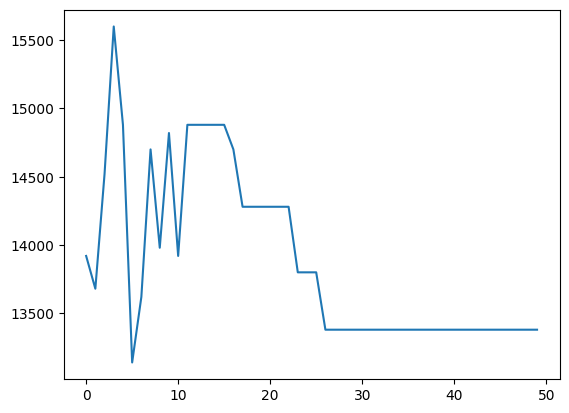

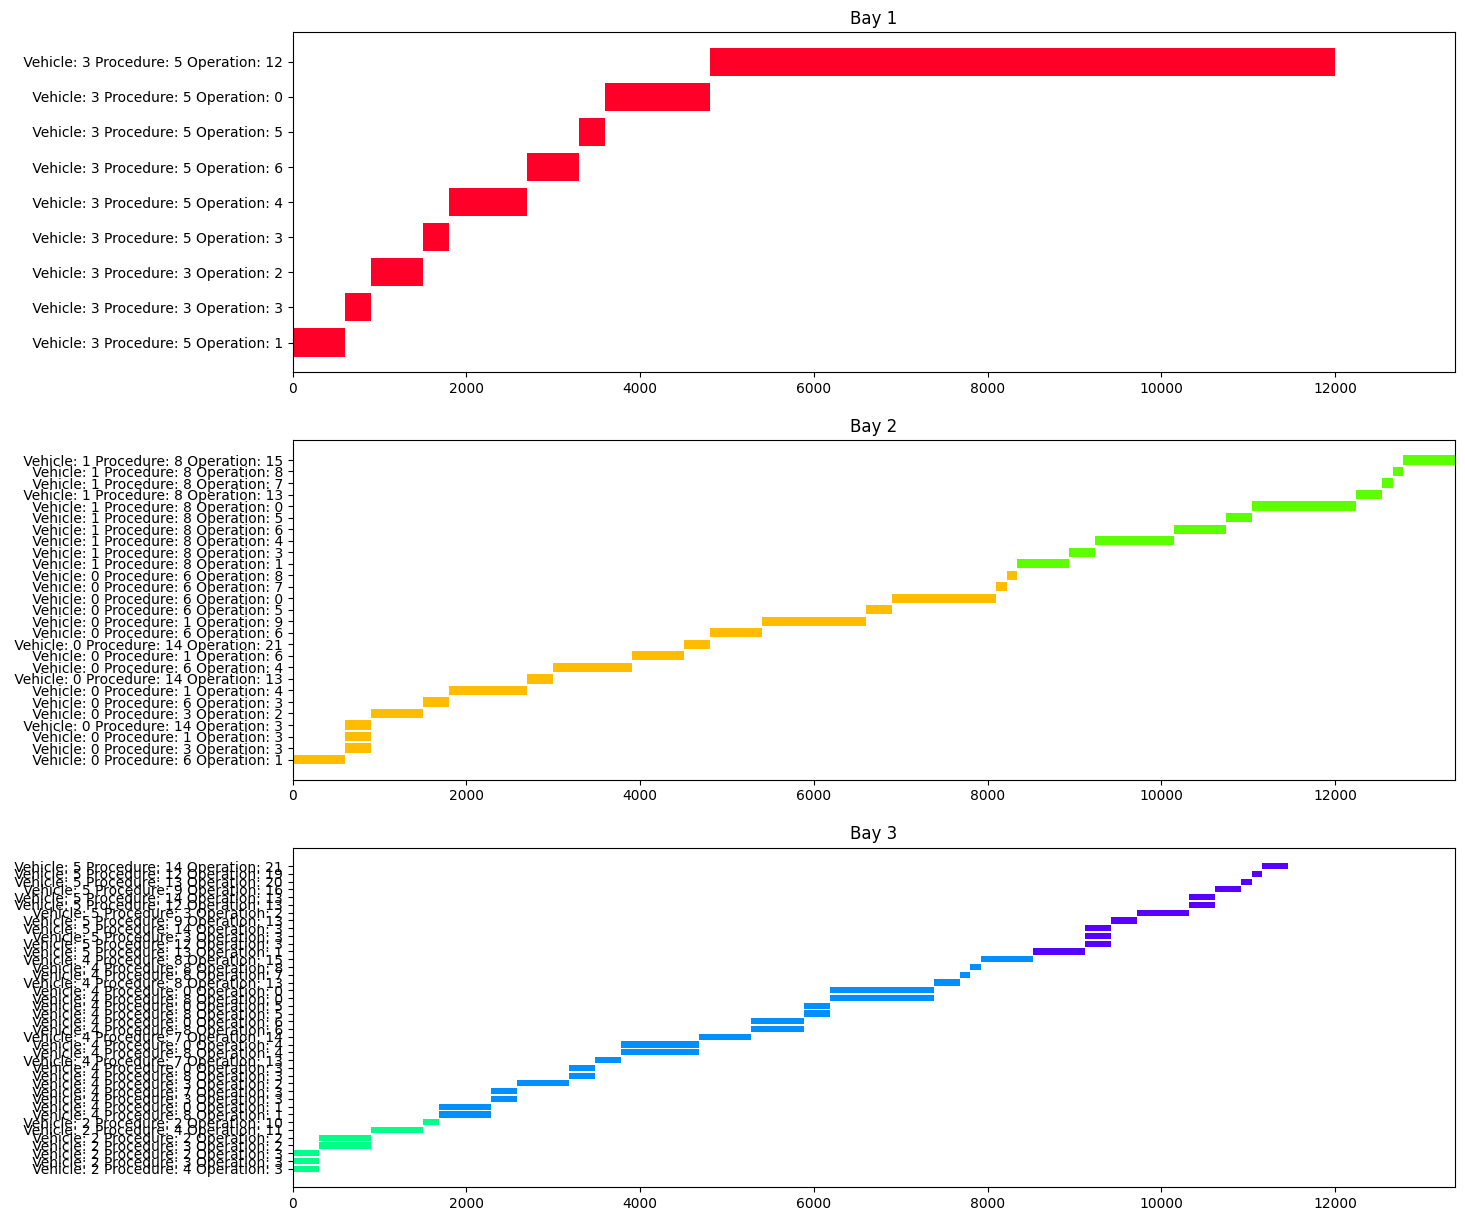

In [1]:
import numpy as np
import pandas as pd
import logging
from compendium import Compendium
from graphing import PlotBayOps
import matplotlib.pyplot as plt
# from multiprocessing.pool import ThreadPool
# from pymoo.core.problem import StarmapParallelization
# from pymoo.algorithms.soo.nonconvex.ga import GA
# from pymoo.optimize import minimize

from optimizers import FacilityOptimizer

logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

facilities_csv = "../data/facilities.csv"
procedure_names_csv = "../data/procedure_names.csv"
procedure_steps_csv = "../data/procedure_steps.csv"
operations_csv = "../data/operations.csv"

c = Compendium(facilities_csv,
               procedure_names_csv,
               procedure_steps_csv,
               operations_csv)

# Load vehicle faults.
V = pd.read_csv("../data/vehicle_faults.csv")
V = V[['vehicle', 'procedure']].to_numpy()

# Columns...
#  ______________________
# | vehicle | procedure |
# |=========|===========|
# |   int   |    int    |
# |   ...   |    ...    |
# V = np.array([[0, 3],
#               [0, 4],
#               [1, 1],
#               [1, 2],
#               [1, 4],
#               [2, 5]])

optim = FacilityOptimizer(V,
                          n_bays=3,
                          n_pop=50,
                          c=c)
res = optim.evaluate()

val = res.algorithm.callback.data["F_best"]
plt.plot(np.arange(len(val)), val)
plt.show()


def print_opt(X):
    if X is None:
        return False

    x = res.X[0] if X.shape[1] > 1 else res.X

    x = np.reshape(x, (-1, 4))

    D = pd.DataFrame(columns=['v', 'p', 'i', 'b'],
                     data=x)

    ops = optim.p.expand_ops(D)
    PlotBayOps(ops,
               color_col='v')


if print_opt(res.X) is False:
    print("No constrained solutions found.")

In [2]:
import numpy as np
import pandas as pd
import logging
from compendium import Compendium
from graphing import PlotBayOps
import matplotlib.pyplot as plt
# from multiprocessing.pool import ThreadPool
# from pymoo.core.problem import StarmapParallelization
# from pymoo.algorithms.soo.nonconvex.ga import GA
# from pymoo.optimize import minimize

from optimizers import FacilityOptimizer

logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

facilities_csv = "../data/facilities.csv"
procedure_names_csv = "../data/procedure_names.csv"
procedure_steps_csv = "../data/procedure_steps.csv"
operations_csv = "../data/operations.csv"

c = Compendium(facilities_csv,
               procedure_names_csv,
               procedure_steps_csv,
               operations_csv)

# Load vehicle faults.
V = pd.read_csv("../data/vehicle_faults.csv")
V = V[['vehicle', 'procedure']].to_numpy()

# Columns...
#  ______________________
# | vehicle | procedure |
# |=========|===========|
# |   int   |    int    |
# |   ...   |    ...    |
# V = np.array([[0, 3],
#               [0, 4],
#               [1, 1],
#               [1, 2],
#               [1, 4],
#               [2, 5]])

optim = FacilityOptimizer(V,
                          n_bays=3,
                          n_pop=50,
                          c=c)
res = optim.evaluate()

val = res.algorithm.callback.data["F_best"]
plt.plot(np.arange(len(val)), val)
plt.show()


def print_opt(X):
    if X is None:
        return False

    x = res.X[0] if X.shape[1] > 1 else res.X

    x = np.reshape(x, (-1, 4))

    D = pd.DataFrame(columns=['v', 'p', 'i', 'b'],
                     data=x)

    ops = optim.p.expand_ops(D)
    PlotBayOps(ops,
               color_col='v')


if print_opt(res.X) is False:
    print("No constrained solutions found.")

INFO:compendium:Loading compendium...
INFO:compendium:Loading facilities...
INFO:compendium:Loaded 6 facilities.
INFO:compendium:Loading procedure names...
INFO:compendium:Loaded 16 unique procedures.
INFO:compendium:Loading procedures steps...
INFO:compendium:Loaded 66 procedure steps.
INFO:compendium:Loading operations...
INFO:compendium:Loaded 23 operations.
INFO:compendium:Loaded compendium!


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       50 |      1 |  1.0000000000 |  1.0000000000 |             - |             -
     2 |      100 |      1 |  0.000000E+00 |  0.9800000000 |             - |             -
     3 |      150 |      1 |  0.000000E+00 |  0.9200000000 |  0.000000E+00 |             f
     4 |      200 |      1 |  0.000000E+00 |  0.9200000000 |  0.000000E+00 |             f
     5 |      250 |      1 |  0.000000E+00 |  0.8400000000 |  3.000000E+02 |         ideal


Restarted Python 3.8.10